In [9]:
from joblib import load
import pandas as pd
import numpy as np
from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel,ttest_ind

In [3]:
mdict = load('Results.joblib')
per_metric = mdict['per_metric']
metrics = mdict['metrics']
paths = mdict['paths']
paths

['./australian/',
 './balance/',
 './monk2/',
 './sonar/',
 './balance/',
 './MultiDigit-F1/',
 './spambase/',
 './cnae9/',
 './madelon/',
 './titanic/',
 './usps/']

In [4]:
datasets = ['australian',
            'balance',
            'monk-2',
            'sonar',
            'balance',
            'Digit-MultiF1',
            'spambase',
            'CNAE-9',
            'madelon',
            'titanic',
            'usps'
            ]

In [5]:
result_folders = ['results',
                  'results_ANN_2layers']

for folder in result_folders:
    per_metric_ann = [None]*len(metrics)
    path_base = './{}/results_{}_f{}.joblib'
    for dataset in datasets:
        for f in range(1,6):
            mdict = load(path_base.format(folder,dataset,f))
            for i,metric in enumerate(metrics):
                measure = mdict['Fold_{}'.format(f)][metric][0]
                if per_metric_ann[i] is None:
                    per_metric_ann[i] = measure
                else:
                    per_metric_ann[i] = np.vstack([per_metric_ann[i],measure])
    for i in range(len(metrics)):
        per_metric[i] = np.hstack([per_metric[i],per_metric_ann[i]])


####### Friedman test ########


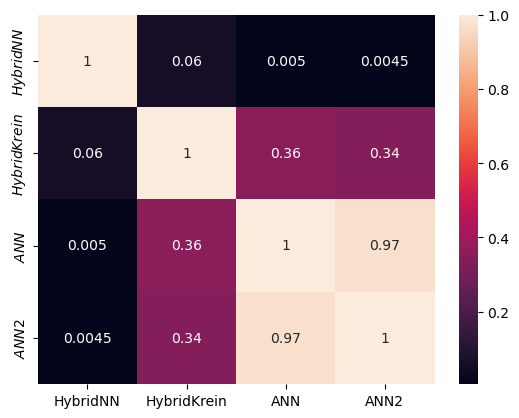

metric:Sen \t $X^2$: 11.127376425855617  ---  p: 0.011056670470030948


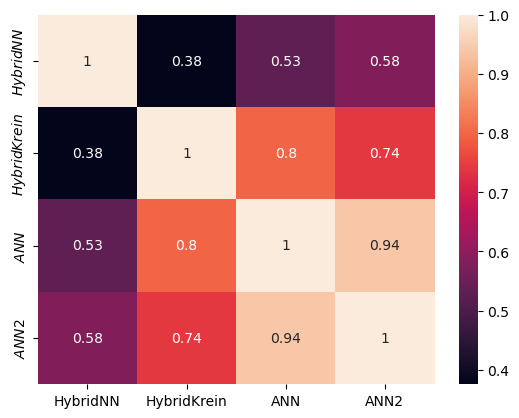

metric:Spe \t $X^2$: 0.8776290630975531  ---  p: 0.830822797154411


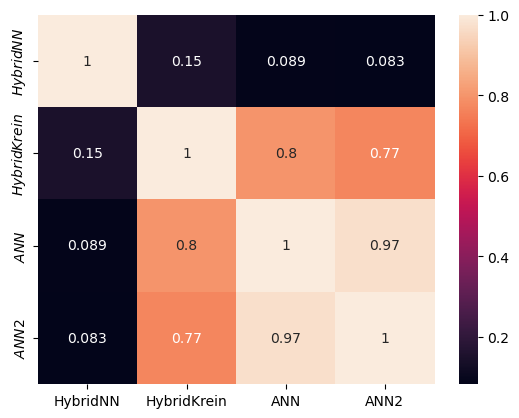

metric:GM \t $X^2$: 4.20112781954893  ---  p: 0.2405489933514323


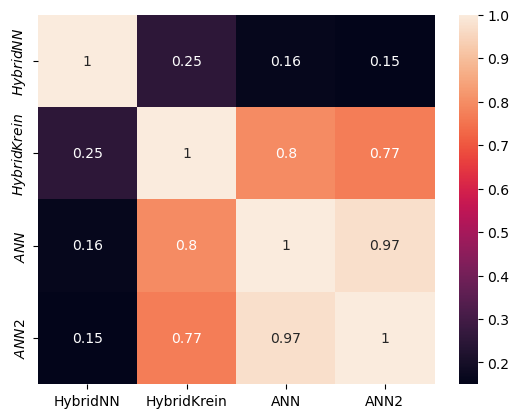

metric:Acc \t $X^2$: 2.847744360902369  ---  p: 0.41570053257180006


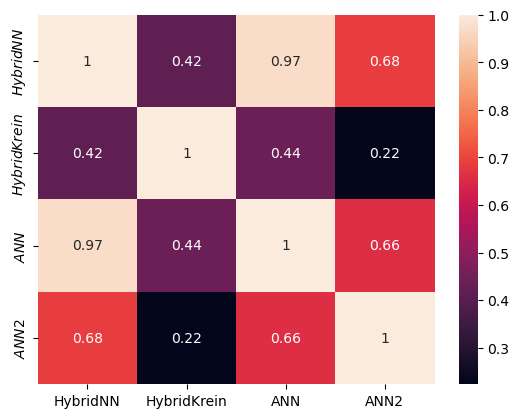

metric:F1 \t $X^2$: 1.5921787709497863  ---  p: 0.6611645284605121


In [6]:
model_names = ['HybridNN','HybridKrein','ANN','ANN2']

from scipy.stats import friedmanchisquare
import scikit_posthocs as sp
print('{:#^30}'.format(' Friedman test '))
for xx,metric in zip(per_metric,metrics):
    groups = tuple(xx[:,i] for i in range(xx.shape[1]))
    df = sp.posthoc_siegel_friedman(xx)
    df.columns = model_names
    df.index = ['$%s$' % name for name in model_names]
    sns.heatmap(df,annot = True)
    plt.show()
    chi_square,p = friedmanchisquare(*groups)
    print(r'metric:{} \t $X^2$: {}  ---  p: {}'.format(metric,chi_square,p))

Sen


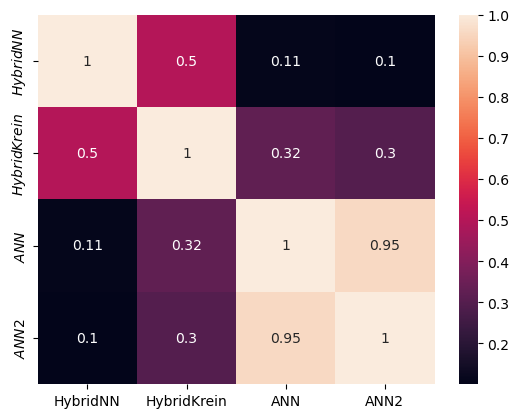

Spe


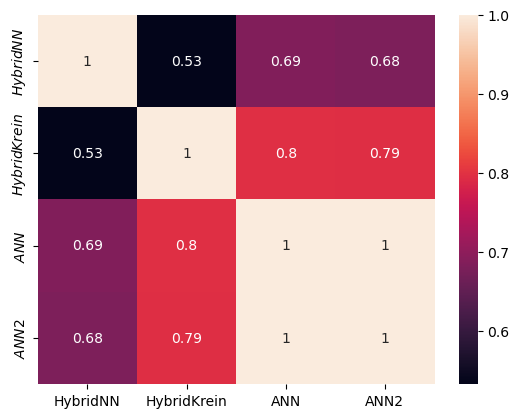

GM


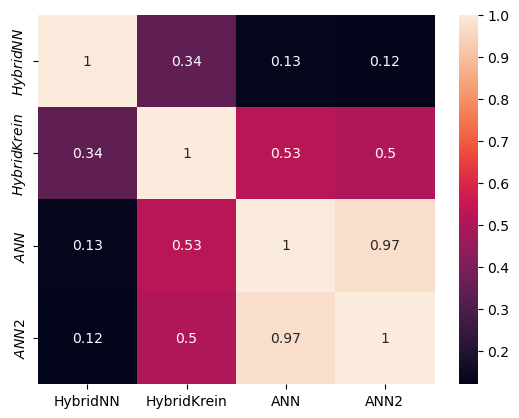

Acc


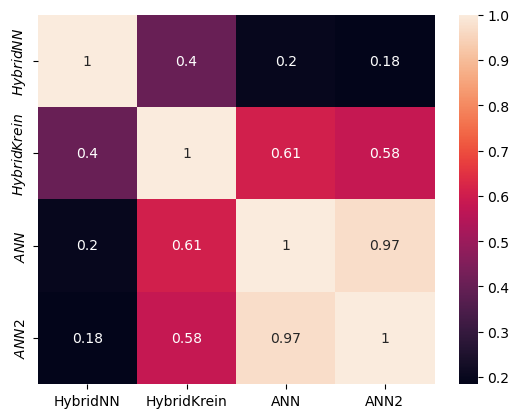

F1


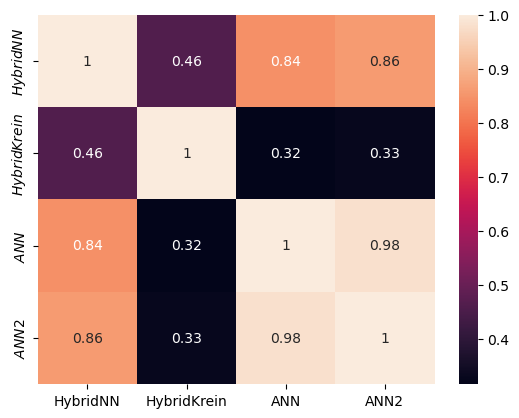

In [8]:
for xx,metric in zip(per_metric,metrics):
    print(metric)
    df = sp.posthoc_ttest(xx.T,equal_var = False)
    df.columns = model_names
    df.index = ['$%s$' % name for name in model_names]
    sns.heatmap(df,annot = True)
    plt.show()

In [12]:
for xx,metric in zip(per_metric,metrics):
    print(metric)
    for i in range(xx.shape[1]):
        for j in range(xx.shape[1]):
            tStat,p = ttest_rel(xx[:,i],xx[:,j])
            print('{} vs {} -- p-value: {}'.format(model_names[i],model_names[j],p))

Sen
HybridNN vs HybridNN -- p-value: nan
HybridNN vs HybridKrein -- p-value: 0.058433227194926385
HybridNN vs ANN -- p-value: 0.038658516643459186
HybridNN vs ANN2 -- p-value: 0.03894139953326529
HybridKrein vs HybridNN -- p-value: 0.058433227194926385
HybridKrein vs HybridKrein -- p-value: nan
HybridKrein vs ANN -- p-value: 0.15022384574189743
HybridKrein vs ANN2 -- p-value: 0.13895969802108543
ANN vs HybridNN -- p-value: 0.038658516643459186
ANN vs HybridKrein -- p-value: 0.15022384574189743
ANN vs ANN -- p-value: nan
ANN vs ANN2 -- p-value: 0.6834309365751783
ANN2 vs HybridNN -- p-value: 0.03894139953326529
ANN2 vs HybridKrein -- p-value: 0.13895969802108543
ANN2 vs ANN -- p-value: 0.6834309365751783
ANN2 vs ANN2 -- p-value: nan
Spe
HybridNN vs HybridNN -- p-value: nan
HybridNN vs HybridKrein -- p-value: 0.10899573570432748
HybridNN vs ANN -- p-value: 0.6790804056198485
HybridNN vs ANN2 -- p-value: 0.6700988815700905
HybridKrein vs HybridNN -- p-value: 0.10899573570432748
HybridKrei